# Chapter 4: Spark 
## Lab assignment: Exercises with MapReduce on Apache Spark

The aim of this notebook is to start working with the RDD API of Apache Spark, aiming to solve the same MapReduce exercises we did in Chapter 2 (MapReduce). The lab assignments are categorized into three levels:

* [Basic](#Part-I---Basic-exercises)
* [Intermediate](#Part-II---Intermediate-level-exercises)
* [Advanced](#Part-III---Advanced-exercices)

Note that in Chapter 2, we solved the exercises at a conceptual level, tackling most exercises with **a single Map followed by a single Reduce function**. In Spark, we may be able to concatenate multiple `map` (or `flatMap`) functions to transform the input data into what we want, letting Spark optimize the whole job, which is going to be easier (and more efficient) to implement. Moreover, we will have a lot more functions available apart from Map and Reduce.

## Set-up

Remember that you need Spark installed in your Python environment (see the Appendix for a complete tutorial).

The first thing we need to do to start working with Spark is to initialize the `SparkContext`. We will also import a few libraries we will use.

In [1]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster("local[*]").setAppName("Spark Lab")
sc = SparkContext(conf = conf)

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/24 09:11:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

# Helper function to test the correctness of the solutions
def test(var, val, msg=""):
    print("1 test passed.") if var == val else print("1 test failed. " + msg)

# Useful tips for programming exercises

When programming in Spark with Jupyter Notebooks it is useful to make use of its interactivity. That is, instead of addressing the exercise as a whole, try to divide it into smaller pieces and program it incrementally, checking that every step is being performed as expected. 

To illustrate this, we are going to implement the Word Count program step by step, and you will later be asked to put everything together as part of Exercise 0. 

We already know that to count words we need to first divide each sentence (string) of the RDD into words. But before that, we should read the data from a file. We can implement a simple function that takes the filename (and its path) as input, and creates an RDD with it. To check that this works, we could use a `take` action right after loading the file and see the first 10 lines of the file. Let's do this.

In [3]:
# First step, check the reading
def word_count(file_path):
    lines = sc.textFile(file_path)
    
    output = lines.take(10) # trigger the reading of the file 
    return output
    
# Test the function with quixote.txt file
word_count("data/quixote.txt")

['',
 'The Project Gutenberg EBook of The History of Don Quixote by Miguel de Cervantes',
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 '',
 '',
 'Title: The History of Don Quixote']

Doing this allows us to see the first 10 elements from the RDD, so we can understand that each element is a string containing a line of the book.

The next step is to divide those lines into words using the `split` function for Strings from Python.

In [4]:
# Next, we check the split
def word_count(file_path):
    lines = sc.textFile(file_path)
    words = lines.map(lambda line: line.split(' '))
    
    output = words.take(10)
    return output
    
# Test the function with quixote.txt file
word_count("data/quixote.txt")

[[''],
 ['The',
  'Project',
  'Gutenberg',
  'EBook',
  'of',
  'The',
  'History',
  'of',
  'Don',
  'Quixote',
  'by',
  'Miguel',
  'de',
  'Cervantes'],
 [''],
 ['This',
  'eBook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with'],
 ['almost',
  'no',
  'restrictions',
  'whatsoever.',
  '',
  'You',
  'may',
  'copy',
  'it,',
  'give',
  'it',
  'away',
  'or'],
 ['re-use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'Project',
  'Gutenberg',
  'License',
  'included'],
 ['with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org'],
 [''],
 [''],
 ['Title:', 'The', 'History', 'of', 'Don', 'Quixote']]

Well, in this case, we get a new RDD composed of lists. Is this what we need? Not really, we want an RDD of words. So looking at that output we can see that we should change something. You may recall that `split` returns a list of words that is split by the character given as argument. Hence, if we just want the words in the RDD we must use `flatMap` instead of `map`.

In [5]:
# Next, we check the split
def word_count(file_path):
    lines = sc.textFile(file_path)
    words = lines.flatMap(lambda line: line.split(' '))
    
    output = words.take(10)
    return output
    
# Test the function with quixote.txt file
word_count("data/quixote.txt")

['',
 'The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'History',
 'of',
 'Don']

Brilliant! Much better now. What is left to finish this? We will ask you to think about it in the next section.

In summary, all exercises can usually be implemented incrementally, which eases finding bugs and problems. If we tried to program the whole Word Count and tested it at the end, we might get an error and could spend much more time trying to correct it and looking to understand where the error comes from. We suggest you test each step of the way to ensure that you are getting what you expect.

# Part I - Basic exercises

## Exercise 0: Word Count with Spark

Let's now implement the complete Word Count program in Spark, considering a few additional things we may need when working with real data. Thus, you're asked to implement a `word_count(file_path)` function that counts the number of words in a document or a number of text documents provided in the input path. The function `word_count(file_path)` should give as an output the 10 most repeated words in descending order of repetitions.

**Input:** Text Document or documents

**Output:** (word, count) - only the 10 words with the highest frequency!

Recommended steps:
1. Read the file or files. Each line should be an element of the RDD. (*transformation*)
2. Split the lines into words. (*transformation*)
3. Filter empty words ('') resulting from previous steps. (*transformation*)
4. Count the number of occurrences of each word. (*transformation*)
5. Return to the driver program the 10 most repeated words. (*action*)

In [6]:
# Step 2: split the lines into words
def word_count(file_path):
    lines = sc.textFile(file_path)
    words = lines.flatMap(lambda line: line.split(' '))
    
    output = words.take(10)
    return output
    
# Test the function with quixote.txt file
word_count("data/quixote.txt")

['',
 'The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'History',
 'of',
 'Don']

In [7]:
# Step 3: Fiilter empty words
def word_count(file_path):
    lines = sc.textFile(file_path)
    words = lines.flatMap(lambda line: line.split(' '))
    words = words.filter(lambda word: word != '')
    
    output = words.take(10)
    return output
    
# Test the function with quixote.txt file
word_count("data/quixote.txt")

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'History',
 'of',
 'Don',
 'Quixote']

In [8]:
# Step 4: Count the number of occurrences of each word
def word_count(file_path):
    lines = sc.textFile(file_path)
    words = lines.flatMap(lambda line: line.split(' '))
    words = words.filter(lambda word: word != '')
    words = words.map(lambda x: (x, 1))
    words = words.reduceByKey(lambda x, y: x + y)
    
    output = words.takeOrdered(10, lambda k_v: -k_v[1])
    return output
    
# Test the function with quixote.txt file
word_count("data/quixote.txt")

[('the', 20923),
 ('and', 16606),
 ('to', 13492),
 ('of', 12866),
 ('that', 7164),
 ('a', 7003),
 ('in', 6860),
 ('I', 5756),
 ('he', 5640),
 ('for', 4534)]

In [9]:
# Just one line
def word_count(file_path):
    lines = sc.textFile(file_path)
    words = lines\
        .flatMap(lambda line: line.split(' '))\
        .filter(lambda word: word != '')\
        .map(lambda x: (x, 1))\
        .reduceByKey(lambda x, y: x + y)\
        .takeOrdered(10, lambda k_v: -k_v[1])
    
    return words
    
# Test the function with quixote.txt file
word_count("data/quixote.txt")

[('the', 20923),
 ('and', 16606),
 ('to', 13492),
 ('of', 12866),
 ('that', 7164),
 ('a', 7003),
 ('in', 6860),
 ('I', 5756),
 ('he', 5640),
 ('for', 4534)]

The program should pass the following test:

In [10]:
top10_quixote = word_count("data/quixote.txt")
print(top10_quixote)
test(top10_quixote, [('the', 20923), ('and', 16606), ('to', 13492), ('of', 12866), 
                                  ('that', 7164), ('a', 7003), ('in', 6860), ('I', 5756), ('he', 5640), 
                                  ('for', 4534)], "Try again!")

[('the', 20923), ('and', 16606), ('to', 13492), ('of', 12866), ('that', 7164), ('a', 7003), ('in', 6860), ('I', 5756), ('he', 5640), ('for', 4534)]
1 test passed.


### Improving Word Count (I): removing punctuation symbols

It seems like the previous Word Count function is working properly, but there are still many things we can do to improve it. Let's start by removing punctuation symbols. When they are attached to the words, we are counting them as different words (e.g., 'hello,' is different from 'hello').

Use the `remove_punctuation_symbols(text)` function to count all words the same regardless of capitalization, punctuation marks, etc.

Steps to follow:
1. Read the file. Each line is an element of the RDD.
2. Remove punctuation marks. (***New***)
2. Divide the lines into words.
3. Filter out empty words.
4. Count occurrences of each word.
5. Return the 10 most repeated words to the driver.

In [11]:
import re
def remove_punctuation_symbols(text):
    """This function converts the string to lower case and removes punctuation symbols and extra spaces"""
    accepted_chars = re.compile(r'[^0-9a-zA-Z ]')
    text = accepted_chars.sub(' ', text.lower()).strip()
    return re.sub(' +', ' ', text)

The above function removes punctuation symbols and each letter is converted lower case. Let's test a couple of examples:

In [12]:
remove_punctuation_symbols('Hi! How are you?')

'hi how are you'

In [13]:
remove_punctuation_symbols(' Removing_all*kind^of+punctuations and extra       spaces     ')

'removing all kind of punctuations and extra spaces'

In [14]:
def word_count(file_path):
    lines = sc.textFile(file_path)
    words = lines\
        .map(lambda line: remove_punctuation_symbols(line))\
        .flatMap(lambda line: line.split(' '))\
        .filter(lambda word: word != '')\
        .map(lambda x: (x, 1))\
        .reduceByKey(lambda x, y: x + y)\
        .takeOrdered(10, lambda k_v: -k_v[1])
    
    return words
    
# Test the function with quixote.txt file
word_count("data/quixote.txt")

[('the', 22471),
 ('and', 17722),
 ('to', 14006),
 ('of', 13491),
 ('that', 7993),
 ('in', 7335),
 ('a', 7287),
 ('i', 6653),
 ('he', 6157),
 ('it', 5680)]

In [15]:
top10_quixote = word_count("data/quixote.txt")
test(top10_quixote, [('the', 22471), ('and', 17722), ('to', 14006), ('of', 13491), ('that', 7993),
                                 ('in', 7335), ('a', 7287), ('i', 6653), ('he', 6157), ('it', 5680)],
                  'Try again!')

1 test passed.


### Improving word count II: removing stop words

We are now better at counting words after removing the punctuation symbols, but we can see that the most repeated words are meaningless, in the sense that they are just words that do not provide any useful information about the text itself. In fact, these are known as [stop words](https://en.wikipedia.org/wiki/Stop_word).

Here is a list of common English stop words:

In [16]:
stop_words = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 
              'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 
              'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into',
              'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 
              'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below',
              'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me',
              'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 
              'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she',
              'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and',
              'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 
              'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not',
              'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too',
              'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't',
              'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 
              'how', 'further', 'was', 'here', 'than']

Use this list to remove this words from our RDD to avoid counting them.

In [17]:
def word_count(file_path):
    lines = sc.textFile(file_path)
    words = lines\
        .map(lambda line: remove_punctuation_symbols(line))\
        .flatMap(lambda line: line.split(' '))\
        .filter(lambda word: word != '' and word not in stop_words)\
        .map(lambda x: (x, 1))\
        .reduceByKey(lambda x, y: x + y)\
        .takeOrdered(10, lambda k_v: -k_v[1])
    
    return words
    
# Test the function with quixote.txt file
word_count("data/quixote.txt")

[('said', 2627),
 ('quixote', 2327),
 ('sancho', 2205),
 ('one', 1623),
 ('would', 1251),
 ('thou', 1229),
 ('say', 904),
 ('good', 889),
 ('may', 855),
 ('see', 774)]

In [18]:
top10_quixote = word_count("data/quixote.txt")
test(top10_quixote, [('said', 2627), ('quixote', 2327), ('sancho', 2205), ('one', 1623), ('would', 1251),
                                  ('thou', 1229), ('say', 904), ('good', 889), ('may', 855), ('see', 774)],
                  'Try again!')

1 test passed.


You will notice that there are still several words that are typically found in books (like said, say,...). You can still add new unwanted words to the list of stop words to get more meaningful words only. This is an example of how we can incrementally improve our initial solution. In reality, whether removing words is required or not would be just a requisite defined by the specific application you are working on.

## Exercise 1. Histogram of word repetition

Provide a histogram of word repetitions, that is, the number of words that are repeated X times:

* 1 time - 3 words
* 2 times - 10 words
* 3 times, 20 words
...

You are asked to implement a `histogram_reps(file_path)` function in Spark that **must not** use the function `word_count(file_path)`, but it could use part of the code you did before. All the processing must be done with RDDs, and there should be a single `collect()` at the end to return a list. The list must be ordered by the number of times. Recall removing punctuation symbols when computing the histogram (but don't remove stop words).

**Input**: A text document or multiple text documents

**Output**: (X times, number of words)


In [19]:
def histogram_reps(file_path):
    histo = sc.textFile(file_path)\
        .map(lambda line: remove_punctuation_symbols(line))\
        .flatMap(lambda line: line.split(' '))\
        .filter(lambda word: word != '')\
        .map(lambda x: (x, 1))\
        .reduceByKey(lambda x, y: x + y)\
        .map(lambda k_v: (k_v[1], 1))\
        .reduceByKey(lambda x, y: x + y)\
        .sortByKey()\
        .collect()

    return histo
    
histogram_reps('data/quixote.txt')[:20] # look at the first 20 results

[(1, 6303),
 (2, 2469),
 (3, 1382),
 (4, 903),
 (5, 688),
 (6, 511),
 (7, 367),
 (8, 340),
 (9, 239),
 (10, 207),
 (11, 171),
 (12, 199),
 (13, 135),
 (14, 132),
 (15, 118),
 (16, 106),
 (17, 94),
 (18, 100),
 (19, 79),
 (20, 74)]

The program should pass the following test:

In [20]:
hist_quixote = histogram_reps("data/quixote.txt")
test(hist_quixote[:10],[(1, 6303), (2, 2469), (3, 1382), (4, 903), (5, 688), (6, 511), (7, 367), (8, 340), 
                                     (9, 239), (10, 207)], "Try again!")

1 test passed.


You could plot this with the matplotlib library:

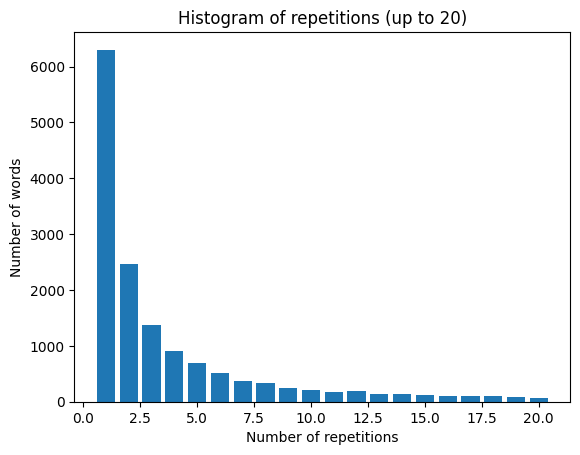

In [21]:
(x_values, y_values) = zip(*hist_quixote[:20])
plt.bar(x_values, y_values)
plt.title('Histogram of repetitions (up to 20)')
plt.xlabel('Number of repetitions')
plt.ylabel('Number of words')
plt.show()

## Exercise 2. Histogram of the length of the words

Provide a histogram of the length of the words. Word repetition is not a problem, so if you have the word 'bye' twice in your document, you would add 2 to the number of words of length 3.

* Length 1 - 100 times
* Length 2 - 300 times
* Length 3 - 400 times
...

You are asked to implement a `histogram_length(file_path)` function in Spark. All the processing must be done with RDDs, and there should be a single `collect()` at the end to return a list. The list must be ordered by the length of the words. Recall removing punctuation symbols when computing the histogram (but don't remove stop words).

**Input**: A text document or multiple text documents

**Output**: (Length, number of words)

**Note: We are going to assume that the maximum word length is 16 characters, so anything above that shouldn't appear in the result.**

In [22]:
def histogram_length(file_path):
    histo = sc.textFile(file_path)\
        .map(lambda line: remove_punctuation_symbols(line))\
        .flatMap(lambda line: line.split(' '))\
        .filter(lambda word: word != '')\
        .map(lambda x: (x, 1))\
        .reduceByKey(lambda x, y: x + y)\
        .map(lambda k_v: (len(k_v[0]), k_v[1]))\
        .reduceByKey(lambda x, y: x + y)\
        .filter(lambda k_v: k_v[0] <= 16)\
        .sortByKey()\
        .collect()

    return histo
    
histogram_length("data/quixote.txt")

[(1, 16557),
 (2, 86007),
 (3, 104061),
 (4, 85836),
 (5, 42352),
 (6, 34381),
 (7, 29737),
 (8, 15982),
 (9, 10454),
 (10, 6409),
 (11, 2516),
 (12, 1210),
 (13, 482),
 (14, 152),
 (15, 60),
 (16, 7)]

The program should pass the following test:

In [23]:
length_quixote = histogram_length("data/quixote.txt")
print(length_quixote)
test(length_quixote, [(1, 16557), (2, 86007), (3, 104061), (4, 85836), (5, 42352), (6, 34381), (7, 29737),
                                   (8, 15982), (9, 10454), (10, 6409), (11, 2516), (12, 1210), (13, 482), (14, 152),
                                   (15, 60), (16, 7)],"Try again!")

[(1, 16557), (2, 86007), (3, 104061), (4, 85836), (5, 42352), (6, 34381), (7, 29737), (8, 15982), (9, 10454), (10, 6409), (11, 2516), (12, 1210), (13, 482), (14, 152), (15, 60), (16, 7)]
1 test passed.


**Task:** Use the previous example to draw the histogram with matplotlib.

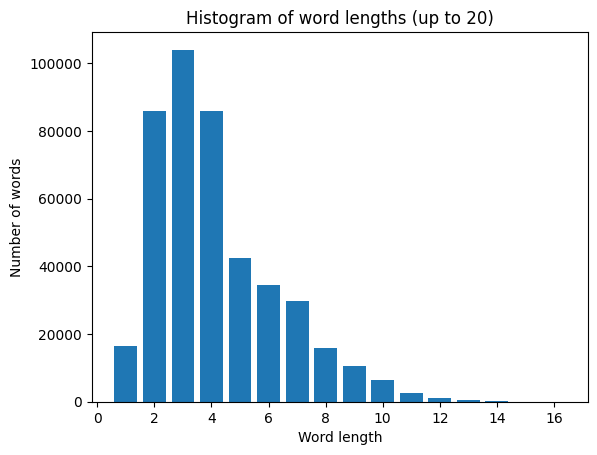

In [24]:
(x_values, y_values) = zip(*length_quixote[:20])
plt.bar(x_values, y_values)
plt.title('Histogram of word lengths (up to 20)')
plt.xlabel('Word length')
plt.ylabel('Number of words')
plt.show()

## Exercise 3. Average length of the words in a document

You are now asked to implement an `average_length(file_path)` function in Spark that provides the average length of the words in a document or documents. All the processing must be done with RDDs, and the last instruction must be the only one returning a result to the driver. Recall removing punctuation symbols before computing the average (but don't remove stop words).

**Input**: A text document or multiple text documents

**Output**: Average length of the words

**Note: Again, we are going to assume that the maximum word length is 16 characters, so anything above that shouldn't be used to compute the average**


You can do it in two different ways (you can try both and check possible differences): 

- **Option 1**. As we have done in Chapter 2 (MapReduce): you will need to get the total length of the words in the text and the total number of words in just one MapReduce job. Then, you just need to make the division.

In [27]:
def average_length(file_path):
    avg = sc.textFile(file_path)\
        .map(lambda line: remove_punctuation_symbols(line))\
        .flatMap(lambda line: line.split(' '))\
        .filter(lambda word: word != '')\
        .map(lambda x: (x, 1))\
        .reduceByKey(lambda x, y: x + y)\
        .map(lambda k_v: (len(k_v[0]), k_v[1]))\
        .reduceByKey(lambda x, y: x + y)\
        .filter(lambda k_v: k_v[0] <= 16)\
        .map(lambda k_v: (k_v[0] * k_v[1], k_v[1]))\
        .reduce(lambda x, y: (x[0] + y[0], x[1] + y[1]))
    
    return avg[0] / avg[1]
    
average_length("data/quixote.txt")

4.144714731443846

The program should pass the following test:

In [28]:
avg = average_length("data/quixote.txt")
test(round(avg,5), 4.14471, 'Try again!')

1 test passed.


- **Option 2**. Using some built-in functions from Spark: you can think of a function available from Spark API that can simplify the implementation.

In [31]:
def average_length(file_path):
    avg = sc.textFile(file_path)\
        .map(lambda line: remove_punctuation_symbols(line))\
        .flatMap(lambda line: line.split(' '))\
        .filter(lambda word: word != '')\
        .map(lambda word: len(word))\
        .filter(lambda length: length <= 16)\
        .mean()
    
    return avg

average_length("data/quixote.txt")

4.1447147314438695

The program should pass the following test:

In [32]:
avg = average_length("data/quixote.txt")
test(round(avg,5), 4.14471, 'Try again!')

[Stage 75:>                                                         (0 + 2) / 2]

1 test passed.


## Exercise 4. LastFM list of top 20 most played artists (groups)

You are asked to implement a `top20_artists(file_path)` function in Spark that provides the list of the top 20 most listened artists (groups) in the [LastFM 360K users dataset](http://ocelma.net/MusicRecommendationDataset/lastfm-360K.html).

We will download the dataset using Python and get a subset of it while developing our solution. Then, you will test it with the whole dataset.

The [LastFM dataset we are going to use](http://ocelma.net/MusicRecommendationDataset/index.html) has the following format (separated by tab character `'\t'`):

    user-id \t artist-id \t artist-name \t number_of_plays

That is, we have a row for each `user-id` and `artist-id` with the number of times the user has played a track from that artists/group.

The function should have the following input and output:

**Input:** LastFM file (`usersha1-artmbid-artname-plays.tsv` or a subset of it) 

**Output:** List of the 20 most played artist/groups ordered by the number of total plays


We will first prepare the data:
* Download it from http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-360K.tar.gz
* Decompress the file
* Get a subset of data for the first tests

We will start installing `wget` if it is not yet installed in our environment. With `wget` we are able to download any file from the internet using Python (also available in the command line of Unix-based systems).

In [33]:
!pip install wget

  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'wget' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'wget'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9685 sha256=2ef33518cec3582948918ab26e261509fa2db67368f17a34a20511ad93076036
  Stored in directory: /home/alumno/.cache/pip/wheels/8a/b8/04/0c88fb22489b0c049bee4e977c5689c7fe597d6c4b0e7d0b6a
Successfully built wget


We can now use `wget` to download the dataset (570mb).

In [34]:
import wget
wget.download('http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-360K.tar.gz', out='data')

100% [..................................................] 569202935 / 569202935

'data/lastfm-dataset-360K.tar.gz'

Once downloaded, we can decompress the file (if something fails, you can also decompress it yourself from the file explorer).

In [35]:
!tar -xzf data/lastfm-dataset-360K.tar.gz -C data/

We will now generate a subset with the first 3000 lines named `sample3000_usersha1-artmbid-artname-plays.tsv`. This will help us testing our solution faster. 

If you are using a UNIX system, you could do this very easily as:

```
!head -n 1000 'data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv' > 'data/lastfm-dataset-360K/sample3000_usersha1-artmbid-artname-plays.tsv'
```

But in case you are not, you can use the following function: 

In [36]:
!head -n 1000 'data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv' > 'data/lastfm-dataset-360K/sample3000_usersha1-artmbid-artname-plays.tsv

/bin/bash: -c: line 1: unexpected EOF while looking for matching `''


In [37]:
def get_subset(input_filename, output_filename, num_lines, enc = "utf-8"):
    with open(input_filename, encoding=enc) as openfile:
        with open(output_filename, 'w', encoding=enc) as outfile:
            for i in range(num_lines):
                line = openfile.readline()
                outfile.write(line)

In [38]:
get_subset('data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv','data/lastfm-dataset-360K/sample3000_usersha1-artmbid-artname-plays.tsv', 3000 )

You can now start programming the solution.

In [52]:
# user-id \t artist-id \t artist-name \t number_of_plays
def top20_artists(file_path):
    top20 = sc.textFile(file_path)\
        .map(lambda x: (x.split('\t')[2], int(x.split('\t')[3])))\
        .reduceByKey(lambda x, y: x + y)\
        .takeOrdered(20, lambda k_v: -k_v[1])
    
    return top20
    
top20_artists('./data/lastfm-dataset-360K/sample3000_usersha1-artmbid-artname-plays.tsv')
#top20_artists('./data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv')

[('radiohead', 13117),
 ('the most serene republic', 12763),
 ('nine inch nails', 11686),
 ('arctic monkeys', 10943),
 ('stars', 9045),
 ('the beatles', 8682),
 ('3 na bossa', 7925),
 ('coldplay', 7899),
 ('broken social scene', 6711),
 ('kingston wall', 5992),
 ('bright eyes', 5914),
 ('the libertines', 5727),
 ('have heart', 5361),
 ('boris', 5337),
 ('sigur rós', 5177),
 ('luminous orange', 5120),
 ('blink-182', 4660),
 ('they might be giants', 4558),
 ('queen', 4451),
 ('bob dylan', 4443)]

The program should pass the following tests.

In [53]:
top20_artists_small = top20_artists('./data/lastfm-dataset-360K/sample3000_usersha1-artmbid-artname-plays.tsv')
test(top20_artists_small, [(u'radiohead', 13117), (u'the most serene republic', 12763), (u'nine inch nails', 11686),
                                       (u'arctic monkeys', 10943), (u'stars', 9045), (u'the beatles', 8682), (u'3 na bossa', 7925),
                                       (u'coldplay', 7899), (u'broken social scene', 6711), (u'kingston wall', 5992), (u'bright eyes', 5914),
                                       (u'the libertines', 5727), (u'have heart', 5361), (u'boris', 5337), (u'sigur r\xf3s', 5177), 
                                       (u'luminous orange', 5120), (u'blink-182', 4660), (u'they might be giants', 4558), (u'queen', 4451), 
                                       (u'bob dylan', 4443)],
                  'Try it again!')

1 test passed.


When running the largest dataset, you can take a look to its progress at <http://localhost:4040> or at the command line. If it takes too long in your PC, running the previous test should be enough.

In [54]:
top20_artists_big = top20_artists('./data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv')
test(top20_artists_big, [(u'the beatles', 30499140), (u'radiohead', 27452136), (u'coldplay', 16701858), (u'pink floyd', 15965959), 
                                     (u'metallica', 15498759), (u'muse', 15463089), (u'nine inch nails', 14090643), (u'red hot chili peppers', 13562637),
                                     (u'linkin park', 12848569), (u'system of a down', 11927204), (u'in flames', 11295957), 
                                     (u'death cab for cutie', 10587605), (u'placebo', 9848924), (u'nightwish', 9765770), (u'the killers', 9607866), 
                                     (u'iron maiden', 9509435), (u'bob dylan', 9454759), (u'nirvana', 9284068), (u'depeche mode', 9243291), 
                                     (u'rammstein', 8809758)],
                  'Try it again!')

[Stage 94:==============================================>         (41 + 4) / 49]

1 test passed.


## Exercise 5. LastFM list of the top 20 most popular artists (groups)

You are asked to implement a `top20_popular_artists(file_path)` function in Spark that provides the list of the top 20 most popular artists (groups) in the [LastFM 1K users dataset](http://ocelma.net/MusicRecommendationDataset/lastfm-1K.html). We will measure popularity in terms of the number of different (unique) users that have played an artist (group). This means that each user will count only once for each artist. Note that the same `user-id` and `artist-id` may be repeated more than once in the dataset.

Unlike the previous exercise, we will use another [LastFM dataset](http://ocelma.net/MusicRecommendationDataset/index.html) dataset available that contains the full listening history of 1000 users. This dataset has the following format (separated by tab character `'\t'`):

    user-id \t timestamp \t artist-id \t artist-name \t track-id \t trackname

That is, we have a row for each time a track is played by a `user-id`.

The function should have the following input and output:

**Input:** LastFM file (`userid-timestamp-artid-artname-traid-traname.tsv` or a subset of it) 

**Output:** List of the 20 most popular artist/groups ordered by the number of unique users


**Note:** There are different ways to solve this problem. You can try to think which one will be more efficient (for example, in terms of network traffic).

We will first prepare the data:
* Download it from http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-1K.tar.gz
* Decompress the file
* Get a subset of data for the first tests

If you haven't done it before, you need to install `wget` if it is not yet installed in our environment

In [8]:
!uv add pip
!pip install wget

Resolved 240 packages in 942ms                                       
░░░░░░░░░░░░░░░░░░░░ [0/1] Installing wheels...                                 warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 1.10s                                
 + pip==25.3
  Using cached wget-3.2-py3-none-any.whl


We can now use `wget` to download the dataset (670mb).

In [9]:
import wget
wget.download('http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-1K.tar.gz', out='data')

100% [..................................................] 672741554 / 672741554

'data'

Once downloaded, we can decompress the file (if something fails, you can also decompress it yourself from the file explorer).

In [10]:
# Decompress the data
!tar -xzf data/lastfm-dataset-1K.tar.gz -C data/

tar (child): data/lastfm-dataset-1K.tar.gz: Cannot open: Not a directory
tar (child): Error is not recoverable: exiting now

gzip: stdin: unexpected end of file
tar: Child returned status 2
tar: Error is not recoverable: exiting now


We will now generate a subset with the first 3000 lines named `sample3000_userid-timestamp-artid-artname-traid-traname.tsv`. This will help us testing our solution faster.

In [13]:
import random

def get_random_subset(input_filename, output_filename, num_lines, enc = "iso8859-1"):
    random.seed(12314)

    with open(input_filename, encoding=enc) as openfile:
        with open(output_filename, 'w', encoding=enc) as outfile:
            openfile.seek(0, 2)
            filesize = openfile.tell()
            random_set = sorted(random.sample(range(filesize), num_lines))

            for i in range(num_lines):
                openfile.seek(random_set[i])
                openfile.readline() # first line may be in the middle
                outfile.write(openfile.readline())             


In [14]:
get_random_subset('data/lastfm-dataset-1K/userid-timestamp-artid-artname-traid-traname.tsv', 'data/lastfm-dataset-1K/sample3000_userid-timestamp-artid-artname-traid-traname.tsv',3000)

Now, we can start working on the solutions.

1. Try to solve the exercise using MapReduce to remove duplicates (as we did in Chapter 2).

In [25]:
# user-id \t timestamp \t artist-id \t artist-name \t track-id \t trackname
def top20_popular_artists(file_path):
    output = sc.textFile(file_path)\
        .map(lambda x: ((x.split('\t')[0], x.split('\t')[3]), 1))\
        .reduceByKey(lambda x, y: 1)\
        .map(lambda k_v: (k_v[0][1], 1))\
        .reduceByKey(lambda x, y: x + y)\
        .takeOrdered(20, lambda k_v: -k_v[1])
    
    return output

%time print(top20_popular_artists('./data/lastfm-dataset-1K/sample3000_userid-timestamp-artid-artname-traid-traname.tsv'))
# %time print(top20_popular_artists('./data/lastfm-dataset-1K/userid-timestamp-artid-artname-traid-traname.tsv'))

[('The Beatles', 21), ('Muse', 13), ('Nine Inch Nails', 12), ('Interpol', 11), ('Coldplay', 10), ('System Of A Down', 10), ('Radiohead', 10), ('Depeche Mode', 10), ('Placebo', 9), ('Sonic Youth', 9), ('Pink Floyd', 9), ('Snow Patrol', 8), ('Arctic Monkeys', 8), ('Sigur Rós', 8), ('The Cure', 8), ('Death Cab For Cutie', 7), ('David Bowie', 7), ('Daft Punk', 7), ('Pj Harvey', 7), ('The Rolling Stones', 7)]
CPU times: user 14 ms, sys: 485 μs, total: 14.5 ms
Wall time: 965 ms


2. Try to solve the exercise using `distinct` from Spark.

In [28]:
def top20_popular_artists(file_path):
    output = sc.textFile(file_path)\
        .map(lambda x: ((x.split('\t')[0], x.split('\t')[3])))\
        .distinct()\
        .map(lambda k_v: (k_v[1], 1))\
        .reduceByKey(lambda x, y: x + y)\
        .takeOrdered(20, lambda k_v: -k_v[1])
    
    return output

%time print(top20_popular_artists('./data/lastfm-dataset-1K/sample3000_userid-timestamp-artid-artname-traid-traname.tsv'))
# %time print(top20_popular_artists('./data/lastfm-dataset-1K/userid-timestamp-artid-artname-traid-traname.tsv'))

[('The Beatles', 21), ('Muse', 13), ('Nine Inch Nails', 12), ('Interpol', 11), ('Coldplay', 10), ('System Of A Down', 10), ('Radiohead', 10), ('Depeche Mode', 10), ('Placebo', 9), ('Sonic Youth', 9), ('Pink Floyd', 9), ('Snow Patrol', 8), ('Arctic Monkeys', 8), ('Sigur Rós', 8), ('The Cure', 8), ('Death Cab For Cutie', 7), ('David Bowie', 7), ('Daft Punk', 7), ('Pj Harvey', 7), ('The Rolling Stones', 7)]
CPU times: user 10.8 ms, sys: 1.56 ms, total: 12.4 ms
Wall time: 812 ms


The program should pass the following tests.

In [30]:
top20_popular_artists_small = top20_popular_artists('./data/lastfm-dataset-1K/sample3000_userid-timestamp-artid-artname-traid-traname.tsv')
test(top20_popular_artists_small, [('The Beatles', 21), ('Muse', 13), ('Nine Inch Nails', 12), ('Interpol', 11),
                                                ('Depeche Mode', 10), ('System Of A Down', 10), ('Coldplay', 10), ('Radiohead', 10),
                                                ('Sonic Youth', 9), ('Pink Floyd', 9), ('Placebo', 9), ('Arctic Monkeys', 8),
                                                ('The Cure', 8), ('Sigur Rós', 8), ('Snow Patrol', 8), ('The Smashing Pumpkins', 7),
                                                ('U2', 7), ('Daft Punk', 7), ('The Rolling Stones', 7), ('The Shins', 7)],
                  'Try it again!')

1 test failed. Try it again!


When running the largest dataset, you can take a look to its progress at <http://localhost:4040> or at the command line.

If it takes too long in your PC, running the first test should be enough.

In [ ]:
top20_popular_artists_big = top20_popular_artists('./datos/lastfm-dataset-1K/userid-timestamp-artid-artname-traid-traname.tsv')
test(top20_popular_artists_big, [('Radiohead', 710), ('Coldplay', 637), ('The Beatles', 615), ('Muse', 595),
                                              ('The Cure', 577), ('The Killers', 577), ('Red Hot Chili Peppers', 572), 
                                              ('Nirvana', 564), ('The White Stripes', 562), ('Franz Ferdinand', 562),
                                              ('Beck', 560), ('David Bowie', 560), ('Depeche Mode', 558), ('Air', 552),
                                              ('Pink Floyd', 539), ('Massive Attack', 538), ('Daft Punk', 538), ('U2', 534),
                                              ('The Smashing Pumpkins', 528), ('Gorillaz', 523)],
                  'Try it again!')

# 🔝 TESTS ARE WRONG 🔝

# Part II - Intermediate level exercises

## Exercise 6. Mutually linked URLs

Obtain a list of mutually linked URLs. That is, you need to find which URLs are mutually linking each other in their webpage content.

You are asked to implement a function `mutually_linked(file_path)` that reads a file that contains a list of URLs for each URL indicating which URLs are referred in each webpage. The function should find which URLs are being mutually linked.

**Input**: A file with the following format: URL -> List of URLs. 

    URL_1 -> URL_2 URL_4
    URL_2 -> URL_1 URL_3 URL_4 URL_5 URL_6
    URL_3 -> URL_2 URL_5 URL_6
    URL_4 -> URL_2 URL_3 URL_5
    URL_5 -> URL_2 URL_3 URL_4
    URL_6 -> URL_2 URL_4

**Output**: (pair of mutually linked URLs)

    (URL_1 URL_2)
    (URL_2 URL_3)
    (URL_2 URL_4)
    (URL_2 URL_5)
    (URL_2 URL_6)
    (URL_3 URL_5)
    (URL_4 URL_5)


Recommended steps:

- Parse the input file to create an RDD of tuples like this: 

```
[('URL_1', ['URL_2', 'URL_4']), 
 ('URL_2', ['URL_1', 'URL_3', 'URL_4', 'URL_5', 'URL_6']), 
 ('URL_3', ['URL_2', 'URL_5', 'URL_6']), 
 ('URL_4', ['URL_2', 'URL_3', 'URL_5']), 
 ('URL_5', ['URL_2', 'URL_3', 'URL_4']), 
 ('URL_6', ['URL_2', 'URL_4'])]
```

- For each one of these, you could use a function to create a list of tuples that look like this:

```
[(('URL_1', 'URL_2'), 1), 
 (('URL_1', 'URL_4'), 1), 
 (('URL_1', 'URL_2'), 1)]
```




**Note**:  Make sure you sort the tuples that will be acting as keys. Lists cannot be used as keys in Spark because they are mutable. When you sort a tuple with `sorted`, you will get a list, which must be converted back to a tuple.

In [39]:
def parse_input(input_str):
    return (input_str.split(' -> ')[0], [url for url in (input_str.split(' -> ')[1]).split(' ')])
    
print(parse_input('URL_2 -> URL_1 URL_3 URL_4 URL_5 URL_6'))

def gen_sorted_combs(input_tuple):
    return [(tuple(sorted((input_tuple[0], url))), 1) for url in input_tuple[1]]

print(gen_sorted_combs(parse_input('URL_2 -> URL_1 URL_3 URL_4 URL_5 URL_6')))

('URL_2', ['URL_1', 'URL_3', 'URL_4', 'URL_5', 'URL_6'])
[(('URL_1', 'URL_2'), 1), (('URL_2', 'URL_3'), 1), (('URL_2', 'URL_4'), 1), (('URL_2', 'URL_5'), 1), (('URL_2', 'URL_6'), 1)]


In [50]:
def mutual_links(file_path):
    output = sc.textFile(file_path)\
        .flatMap(lambda x: gen_sorted_combs(parse_input(x)))\
        .reduceByKey(lambda x, y: x + y)\
        .filter(lambda k_v: k_v[1] == 2)\
        .map(lambda k_v: (k_v[0][0], k_v[0][1]))\
        .collect()
    return output

mutual_links("./data/urls.txt")

[('URL_2', 'URL_4'),
 ('URL_2', 'URL_5'),
 ('URL_4', 'URL_5'),
 ('URL_1', 'URL_2'),
 ('URL_2', 'URL_3'),
 ('URL_2', 'URL_6'),
 ('URL_3', 'URL_5')]

The program should pass the following test:

In [51]:
test(sorted(mutual_links("./data/urls.txt")), [('URL_1', 'URL_2'), ('URL_2', 'URL_3'), ('URL_2', 'URL_4'), 
                                                    ('URL_2', 'URL_5'), ('URL_2', 'URL_6'), ('URL_3', 'URL_5'), 
                                                    ('URL_4', 'URL_5')], 'Try again!')

1 test passed.


## Exercise 7. Find a list of common friends between pairs of friends

Obtain a list of common friends for each pair of friends. That is, for each two people that are friends (assuming friendship is bi-directional), you need to find the friends in common.

You are asked to implement a function `common_friends(file_path)` that reads a file that contains a list of friends for each person. The function should output for each pair of friends, the list of common friends.

**Input**: A file with the following format: Person -> List of friends. 

```
Isaac -> Mikel John Lucy
Mikel -> Isaac John Lucy Claudia
John -> Isaac Mikel Lucy Claudia
Lucy -> Isaac Mikel John Claudia
Claudia -> Mikel John Lucy
```

**Output**: (pair of friends, list of common friends)
```
(Isaac, Mikel)    -> (John, Lucy)
(Claudia, Mikel)  -> (John, Lucy)
(John, Lucy)      -> (Claudia, Isaac, Mikel)
(Isaac, John)     -> (Lucy, Mikel)
(Isaac, Lucy)     -> (John, Mikel)
(John, Mikel)     -> (Claudia, Isaac, Lucy)
(Lucy, Mikel)     -> (Claudia, Isaac, John)
(Claudia, John)   -> (Lucy, Mikel)
(Claudia, Lucy)   -> (John, Mikel)

```

You could follow similar steps to the ones in the previous exercise:

- Parse the input file to create an RDD of tuples like this: 

```
[('Isaac', ['Mikel', 'John', 'Lucy']), ('Mikel', ['Isaac', 'John', 'Lucy', 'Claudia']), ('John', ['Isaac', 'Mikel', 'Lucy', 'Claudia']), ('Lucy', ['Isaac', 'Mikel', 'John', 'Claudia']), ('Claudia', ['Mikel', 'John', 'Lucy'])]
```

- For each one of these, we would recommend a function to create a list of tuples that looks like this:

```
[(('Isaac', 'Mikel'), ['Mikel', 'John', 'Lucy']),
 (('Isaac', 'John'), ['Mikel', 'John', 'Lucy']),
  (('Isaac', 'Lucy'), ['Mikel', 'John', 'Lucy'])
 ]
```

**Note**:  Make sure you sort the tuples that will be acting as keys. Lists cannot be used as keys in Spark because they are mutable. When you sort a tuple with `sorted`, you will get a list, which must be converted back to a tuple.
 
- You will have to aggregate those results by key and perform the final intersection of list of friends.

In [57]:
def parse_input(input_str):
    return (input_str.split(' -> ')[0], [friend for friend in (input_str.split(' -> ')[1]).split(' ')])
    
print(parse_input('Isaac -> Mikel John Lucy'))

def gen_sorted_combs(input_tuple):
    return [
        (
            tuple(sorted((input_tuple[0], friend))),
            [other for other in list(filter(lambda x: x != friend, input_tuple[1]))]
        )
        for friend in input_tuple[1]
    ]

print(gen_sorted_combs(parse_input('Isaac -> Mikel John Lucy')))

('Isaac', ['Mikel', 'John', 'Lucy'])
[(('Isaac', 'Mikel'), ['John', 'Lucy']), (('Isaac', 'John'), ['Mikel', 'Lucy']), (('Isaac', 'Lucy'), ['Mikel', 'John'])]


In [64]:
def common_friends(file_path):
    output = sc.textFile(file_path)\
        .flatMap(lambda x: gen_sorted_combs(parse_input(x)))\
        .reduceByKey(lambda x, y: list(set(x).intersection(set(y))))\
        .collect()
    return output
    
common_friends('data/friends.txt')

[(('Isaac', 'Mikel'), ['John', 'Lucy']),
 (('Isaac', 'John'), ['Lucy', 'Mikel']),
 (('Isaac', 'Lucy'), ['John', 'Mikel']),
 (('John', 'Mikel'), ['Isaac', 'Lucy', 'Claudia']),
 (('Lucy', 'Mikel'), ['Isaac', 'John', 'Claudia']),
 (('John', 'Lucy'), ['Isaac', 'Claudia', 'Mikel']),
 (('Claudia', 'Mikel'), ['John', 'Lucy']),
 (('Claudia', 'John'), ['Lucy', 'Mikel']),
 (('Claudia', 'Lucy'), ['John', 'Mikel'])]

The program should pass the following test.

In [65]:
test(sorted(map(lambda t: (t[0], sorted(t[1])), common_friends("data/friends.txt"))), 
                  sorted(map(lambda t: (t[0], sorted(t[1])), [(('Isaac', 'Mikel'), ['John', 'Lucy']),
                                                              (('Claudia', 'Mikel'), ['John', 'Lucy']),
                                                              (('John', 'Lucy'), ['Claudia', 'Isaac', 'Mikel']),
                                                              (('Isaac', 'John'), ['Lucy', 'Mikel']),
                                                              (('Isaac', 'Lucy'), ['John', 'Mikel']),
                                                              (('John', 'Mikel'), ['Claudia', 'Isaac', 'Lucy']),
                                                              (('Lucy', 'Mikel'), ['Claudia', 'Isaac', 'John']),
                                                              (('Claudia', 'John'), ['Lucy', 'Mikel']),
                                                              (('Claudia', 'Lucy'), ['John', 'Mikel'])])), 
                  'Try again!')

1 test passed.


You can now try your function with a bigger example generated by the following code (also using Spark). Feel free to change the parameters to generate anonimized persons and friends. Note that we are not storing the generated data into disk (we could do it with `saveAsTextFile`). Instead we are getting an RDD. Hence, you need to change the function to directly receive an RDD instead of a file path.

In [66]:
def get_random_friends(n_people, n_friends_mu, n_friends_std):
    n_friends = min(int(np.abs(np.random.randn()*n_friends_mu + n_friends_std)), n_people - 1)
    return " ".join(map(str, list(np.random.choice(n_people, n_friends, replace=False)) ))


def generate_random_friends(n_people, n_friends_mu, n_friends_std):
    rdd = sc.parallelize(range(n_people)) \
        .map(lambda person: str(person) + ' -> ' + get_random_friends(n_people, n_friends_mu, n_friends_std))
    return rdd
#     .saveAsTextFile('data/friends_big_spark.txt/')
    
friends_rdd = generate_random_friends(n_people=1000, n_friends_mu = 50, n_friends_std = 30) 

We check the content of the RDD.

In [67]:
friends_rdd.take(2)

['0 -> 726 457 74 131 510 810 799 85 763 9 535 365 142 950 673 848 340 907 579 769 63 831 171 693 197 578 906 653 203 450 91 824 87 45 121 22 140 666 23 922 644 580 587 462 589 173 414 828 823 571 32 807 489 453 637 169 106 879 911 899 88 448 269 335 646 717 268 697 894 247 326 971 998 35 624 483 648',
 '1 -> 891 882 374 224 111 179 930 218 932 263 415 691 915 739 659 766 759 856 325 242 27 287 980 695 61 335 649 28 161 880 31 47 824 143 499 665 178 630 973 820 203 102 66 353 96 632 38 214 4 200']

Change the `common_friends` function to receive an RDD of text `lines` instead of the `file_path` and to return another RDD with the common friends.

In [69]:
def common_friends(input_rdd):
    output = input_rdd\
        .flatMap(lambda x: gen_sorted_combs(parse_input(x)))\
        .reduceByKey(lambda x, y: list(set(x).intersection(set(y))))
    return output

# Check it first with the simplest example
common_friends_rdd_small = common_friends(sc.textFile('data/friends.txt'))
common_friends_rdd_small.collect()

[(('Isaac', 'Mikel'), ['John', 'Lucy']),
 (('Isaac', 'John'), ['Lucy', 'Mikel']),
 (('Isaac', 'Lucy'), ['John', 'Mikel']),
 (('John', 'Mikel'), ['Isaac', 'Lucy', 'Claudia']),
 (('Lucy', 'Mikel'), ['Isaac', 'John', 'Claudia']),
 (('John', 'Lucy'), ['Isaac', 'Claudia', 'Mikel']),
 (('Claudia', 'Mikel'), ['John', 'Lucy']),
 (('Claudia', 'John'), ['Lucy', 'Mikel']),
 (('Claudia', 'Lucy'), ['John', 'Mikel'])]

Try it now with the larger set.

In [70]:
common_friends_rdd = common_friends(friends_rdd)
common_friends_rdd.take(2)

[(('0', '633'),
  ['276',
   '184',
   '558',
   '973',
   '175',
   '359',
   '638',
   '483',
   '600',
   '541',
   '728',
   '23',
   '422',
   '697',
   '615',
   '335',
   '936',
   '291',
   '18',
   '282',
   '569',
   '853',
   '290',
   '993',
   '980',
   '259',
   '542',
   '937',
   '322',
   '73',
   '969',
   '531',
   '249',
   '261',
   '626',
   '650',
   '800',
   '49',
   '804',
   '79',
   '854',
   '735',
   '871',
   '485',
   '226',
   '929',
   '608',
   '473',
   '607',
   '283',
   '554',
   '631',
   '298',
   '603',
   '924',
   '986',
   '174',
   '691',
   '170',
   '336',
   '318',
   '838',
   '561',
   '255',
   '277',
   '910',
   '62',
   '976',
   '434',
   '101',
   '225',
   '187',
   '868',
   '334',
   '142',
   '491',
   '74',
   '876',
   '191']),
 (('0', '558'),
  ['276',
   '633',
   '184',
   '973',
   '175',
   '359',
   '638',
   '483',
   '600',
   '541',
   '728',
   '23',
   '422',
   '697',
   '615',
   '335',
   '936',
   '291',
   '

**Extra**: Can we recover the list of friends for each person from the result obtained in this exercise? Try it yourself. Is there any problem?

One may be tempted to implement the solution using the lists of common friends. It works for the smaller dataset, but it will take too long with a larger dataset.

In [ ]:
# <FILL-IN WITH YOUR CODE>

def recover_friends(common_friends_rdd):
    # <FILL-IN WITH YOUR CODE>
    return output_rdd

recover_friends(common_friends_rdd).collect()

You could now try with the larger dataset, but be careful, it won't end (or it will take too much time).

Using just the information in the keys you can recover the friend list of each person much faster. This is why it is important to think of the most efficient solution in Big Data.

In [ ]:
# <FILL-IN WITH YOUR CODE>


def recover_friends(common_friends_rdd):
    # <FILL-IN WITH YOUR CODE>
    return output_rdd

recover_friends(common_friends_rdd_small).collect()

Check it now with the larger dataset.

In [ ]:
%%time
common_friends_rdd = common_friends(friends_rdd)
recover_friends(common_friends_rdd).take(2)

## Exercise 8. Find a list of common friends between every pair of people

This exercise is similar to the previous one except for the fact that obtaining the common friends of every pair of people is requested, instead of only between common friends.

You are asked to implement a function `common_friends_all(file_path)` that reads a file that contains a list of friends for each person. The function should output for each pair of people, the list of common friends. Notice that this exercise is computationally hard as every combination between people must be considered. Hence, it won't be very scalable but it will help us understand MapReduce and the limitations in Big Data.

**Input**: A file with the following format: Person -> List of friends. 

```
Isaac -> Mikel John Lucy
Mikel -> Isaac John Lucy Claudia
John -> Isaac Mikel Lucy Claudia
Lucy -> Isaac Mikel John Claudia
Claudia -> Mikel John Lucy
```

**Output**: (pair of friends, list of common friends)
```
(Isaac, Mikel)    -> (John, Lucy)
(Claudia, Mikel)  -> (John, Lucy)
(John, Lucy)      -> (Claudia, Isaac, Mikel)
(Isaac, John)     -> (Lucy, Mikel)
(Isaac, Lucy)     -> (John, Mikel)
(John, Mikel)     -> (Claudia, Isaac, Lucy)
(Lucy, Mikel)     -> (Claudia, Isaac, John)
(Claudia, John)   -> (Lucy, Mikel)
(Claudia, Lucy)   -> (John, Mikel)
(Claudia, Isaac)   -> (Mikel, John, Lucy),

```

You can follow the same ideas as in the previous exercises using an auxiliary function or you could also think of using `cartesian` from RDDs.

In [83]:
def parse_input(input_str):
    return ([friend for friend in (input_str.split(' -> ')[1]).split(' ')], input_str.split(' -> ')[0])
    
print(parse_input('Isaac -> Mikel John Lucy'))

def gen_sorted_combs(input_tuple):
    return [
        (
            tuple(sorted((friend1, input_tuple[0][i2]))),
            input_tuple[1]
        )
        for i1, friend1 in enumerate(input_tuple[0])
        for i2 in range(i1 + 1, len(input_tuple[0]))
        if friend1 != input_tuple[0][i2]
    ]

print(gen_sorted_combs(parse_input('Isaac -> Mikel John Lucy')))

(['Mikel', 'John', 'Lucy'], 'Isaac')
[(('John', 'Mikel'), 'Isaac'), (('Lucy', 'Mikel'), 'Isaac'), (('John', 'Lucy'), 'Isaac')]


In [90]:
def common_friends_all(file_path):
    output = sc.textFile(file_path)\
        .flatMap(lambda x: gen_sorted_combs(parse_input(x)))\
        .mapValues(lambda x: [x])\
        .reduceByKey(lambda x, y: x + y)\
        .collect()
    return output


common_friends_all('data/friends.txt')

[(('John', 'Mikel'), ['Isaac', 'Lucy', 'Claudia']),
 (('Lucy', 'Mikel'), ['Isaac', 'John', 'Claudia']),
 (('John', 'Lucy'), ['Isaac', 'Mikel', 'Claudia']),
 (('Isaac', 'John'), ['Mikel', 'Lucy']),
 (('Isaac', 'Lucy'), ['Mikel', 'John']),
 (('Isaac', 'Mikel'), ['John', 'Lucy']),
 (('Claudia', 'Isaac'), ['Mikel', 'John', 'Lucy']),
 (('Claudia', 'John'), ['Mikel', 'Lucy']),
 (('Claudia', 'Lucy'), ['Mikel', 'John']),
 (('Claudia', 'Mikel'), ['John', 'Lucy'])]

The program should pass the following test.

In [91]:
test(sorted(map(lambda t: (t[0], sorted(t[1])), common_friends_all("data/friends.txt"))), 
                  sorted(map(lambda t: (t[0], sorted(t[1])), [(('Isaac', 'Mikel'), ['John', 'Lucy']),
                                                              (('Claudia', 'Mikel'), ['John', 'Lucy']),
                                                              (('John', 'Lucy'), ['Claudia', 'Isaac', 'Mikel']),
                                                              (('Isaac', 'John'), ['Lucy', 'Mikel']),
                                                              (('Isaac', 'Lucy'), ['John', 'Mikel']),
                                                              (('John', 'Mikel'), ['Claudia', 'Isaac', 'Lucy']),
                                                              (('Lucy', 'Mikel'), ['Claudia', 'Isaac', 'John']),
                                                              (('Claudia', 'John'), ['Lucy', 'Mikel']),
                                                              (('Claudia', 'Lucy'), ['John', 'Mikel']),
                                                              (('Claudia', 'Isaac'), ['Mikel', 'John', 'Lucy'])])), 
                  'Try again!')

1 test passed.


We could try again with the larger dataset modifying the function to receive an RDD and return another RDD. However, the computational cost of this exercise is much bigger than the previous one, so, as we have already mentioned, it is not as scalable as the previous one. It will take very long or you will need to kill the process (it may be different if you are working with a cluster). Let's try with a smaller random RDD.

In [ ]:
def common_friends_all(lines):
    # <FILL-IN WITH YOUR CODE>
    
    return output_rdd.collect()

In [ ]:
rdd = generate_random_friends(n_people=3000, n_friends_mu = 100, n_friends_std = 50) 
common_friends_all(rdd)

# Part III - Advanced exercices

## Exercise 9. Nearest neighbor search

You are asked to implement a function `nearest_neighbor(vectors_rdd, vector)` that finds the index of the nearest neighbor of the input `vector` in an RDD of vectors `vectors_rdd`. `vectors_rdd` will be created before calling the function, for example, reading the file `vectors.txt`, which stores a set of vectors of dimension 3.

Although many distances can be used for nearest neighbor search, we will restrict our implementation to the Euclidean distance. The Euclidean distance between two vectors `a`, `b` of length `N` is computed as follows:

$$ dist(a, b) = \sqrt{ \sum^{N}_{i=1}{ (a[i] - b[i])^2 } } $$

For the sample file (`vectors.txt`), $N=3$, but the program should work for any value of $N$.

The function `nearest_neighbor` expects the following input and outputs:

**Input:** an RDD of vectors and a vector to find its nearest neighbor.

**Output:** index of the most similar vector to the input one (the one with the lowest distance).

To implement this function we suggest following the next steps:

1. Create a function `dist(a, b)` that computes the Euclidean distance between two vectors. You can use the numpy library assuming that `a` and `b` will be two numpy arrays (`numpy.array`).

In [36]:
import numpy as np
def dist(a, b):
    return np.sqrt(np.sum(np.pow(a - b, 2)))

# Check the function dist
a = np.array([1, 2, 1, 4])
b = np.array([1, 3, 3, 4])
dist(a, b)

np.float64(2.23606797749979)

In [4]:
# Check the function dist
a = np.array([1, 2, 1, 4])
b = np.array([1, 3, 3, 4])
test(round(dist(a, b), 5), 2.23607, 'Try it again!')

1 test passed.


2. Create a function `parse_file(file_path)` that reads a file in a `file_path` and returns an RDD of numpy arrays. **Tip:** you may be interested in using [`np.fromstring`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fromstring.html).

In [5]:
def parse_file(file_path):
    output = sc.textFile(file_path)\
        .map(lambda x: np.fromstring(x, sep=','))
    return output
    
vectors_rdd = parse_file('./data/vectors.txt').cache()
vectors_rdd.first()

array([0.22157453, 0.76782045, 0.39891865])

In [6]:
test(vectors_rdd.first().tolist(), 
                  [0.2215745341345421, 0.7678204549927838, 0.3989186468051199], 'Try it again!')
test(vectors_rdd.count(), 100000, 'Try it again!')

1 test passed.
1 test passed.


3. You can now program the `nearest_neighbor(vectors_rdd, vector)` function. **Tips:** Use a broadcast variable to send the vector to all executors (if it was large, it would be much more efficient). To make use of the index of an element in an RDD consider the method [`zipWithIndex()`](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.zipWithIndex.html) that transforms the RDD of `vector` elements into an RDD of `(vector, index)` elements.

    You should explore two options to program the `nearest_neighbor(vectors_rdd, vector)` function:
    
    a. Using the `map` function (named as `nearest_neighbor(vectors_rdd, vector)`).
    
    b. Using the `mapPartitions` function (named as `nearest_neighbor_partitions(vectors_rdd, vector)`). Recall that in this case, instead of working vector by vector, you work with an iterator pointing to all vectors in the partition. The idea is to find the nearest neighbor in each partition to make it faster. You can use a helper function to make it simpler.

### Implement `nearest_neighbor(vectors_rdd, vector)` using `map` function
The idea is that you need to compute the distances to all the vectors in your RDD and take the index of the vector with the minimum distance. To do so, we may be tempted to use the `sortByKey()` transformation after computing the distances and setting them as keys, which will work. However, you could check how this solution differs from using a specifically designed function to be used inside `reduce()` action.

Let's start off with an implementation based on `sortByKey`, and let's check how long it takes:

In [25]:
def nearest_neighbor(vectors_rdd, vector):
    output = vectors_rdd.zipWithIndex()\
        .map(lambda k_v: (dist(k_v[0], vector), k_v[1]))\
        .sortByKey()\
        .first()[1]
    return output
    
%time nearest_neighbor(vectors_rdd, [0.6, 0.5, 0.1])

CPU times: user 12.5 ms, sys: 5 ms, total: 17.5 ms
Wall time: 1.65 s


89697

In [26]:
# Assuming vectors_rdd = parse_file('./data/vectors.txt').cache()
test(nearest_neighbor(vectors_rdd, [0.6, 0.5, 0.1]), 89697, 'Try it again!')
test(nearest_neighbor(vectors_rdd, [0.3, 0.0, 1.0]), 35646, 'Try it again!')

1 test passed.


[Stage 67:>                                                         (0 + 2) / 2]

1 test passed.


Try now with a specifically designed function inside `reduce()` action:

In [29]:
def nearest_neighbor_reduce(d_idx_1, d_idx_2):
    return d_idx_1 if d_idx_1[0] < d_idx_2[0] else d_idx_2
    
def nearest_neighbor(vectors_rdd, vector):
    output = vectors_rdd.zipWithIndex()\
        .map(lambda k_v: (dist(k_v[0], vector), k_v[1]))\
        .reduce(lambda x, y: nearest_neighbor_reduce(x, y))[1]
    return output
    
%time nearest_neighbor(vectors_rdd, [0.6, 0.5, 0.1])

CPU times: user 6.71 ms, sys: 0 ns, total: 6.71 ms
Wall time: 536 ms


89697

In [30]:
# Assuming vectors_rdd = parse_file('./data/vectors.txt').cache()
test(nearest_neighbor(vectors_rdd, [0.6, 0.5, 0.1]), 89697, 'Try it again!')
test(nearest_neighbor(vectors_rdd, [0.3, 0.0, 1.0]), 35646, 'Try it again!')

1 test passed.
1 test passed.


### Implement `nearest_neighbor_partitions(vectors_rdd, vector)` using `mapPartitions` function
Use the knowledge acquired in the previous implementation to implement the `mapPartitions` version where all the distances with respect to the vectors in the partition are computed in an auxiliary function.

The auxiliary function could be developed in at different ways proving different performance. Try to solve at least one of them:

1. Create a function `nearest_neighbor_in_partition(partition, vector_bc)` receiving a `partition` and a broadcasted vector (`vector_bc`) and returns the most similar to `vector_bc` in the `partition`. Recall that the function must return an iterator with a single element containing the distance to the nearest vector and its index. Implement it using Python without any additional libraries.

In [33]:
def nearest_neighbor_in_partition(partition, vector_bc):
    vector = vector_bc.value
    nn = None

    for vec, idx in partition:
        distance = dist(vec, vector)
        if nn is None or distance < nn[0]:
            nn = (distance, idx)

    return [nn]

def nearest_neighbor_partitions(vectors_rdd, vector):
    vector_bc = sc.broadcast(vector)
    output = vectors_rdd.zipWithIndex()\
        .mapPartitions(lambda part: nearest_neighbor_in_partition(part, vector_bc))\
        .reduce(lambda x, y: nearest_neighbor_reduce(x, y))[1]
    return output

%time nearest_neighbor_partitions(vectors_rdd, [0.6, 0.5, 0.1])

CPU times: user 6.14 ms, sys: 1.4 ms, total: 7.54 ms
Wall time: 675 ms


89697

In [34]:
# Assuming vectors_rdd = parse_file('./data/vectors.txt').cache()
test(nearest_neighbor_partitions(vectors_rdd, [0.6, 0.5, 0.1]), 89697, 'Try it again!')
test(nearest_neighbor_partitions(vectors_rdd, [0.3, 0.0, 1.0]), 35646, 'Try it again!')

1 test passed.
1 test passed.


2. Try to improve the performance of the previous function by using numpy arrays. You can try to put all the vectors in `partition` into a numpy `array` and use built-in functions from numpy to compute the nearest neighbor efficiently. **Tip**: you may use the `zip` function from Python to get the vectors and indices from the partition into different variables so that you can use them separately.

In [37]:
def nearest_neighbor_in_partition(partition, vector_bc):
    vector = vector_bc.value
    vecs, indexes = zip(*partition)
    distances = np.apply_along_axis(dist, axis=1, arr=vecs, b=vector)
    min_idx = np.argmin(distances)
    return [(distances[min_idx], indexes[min_idx])]

def nearest_neighbor_partitions(vectors_rdd, vector):
    vector_bc = sc.broadcast(vector)
    output = vectors_rdd.zipWithIndex()\
        .mapPartitions(lambda part: nearest_neighbor_in_partition(part, vector_bc))\
        .reduce(lambda x, y: nearest_neighbor_reduce(x, y))[1]
    return output

%time nearest_neighbor_partitions(vectors_rdd, [0.6, 0.5, 0.1])

CPU times: user 4.7 ms, sys: 4.68 ms, total: 9.38 ms
Wall time: 669 ms


89697

In [38]:
# Assuming vectors_rdd = parse_file('./data/vectors.txt').cache()
test(nearest_neighbor_partitions(vectors_rdd, [0.6, 0.5, 0.1]), 89697, 'Try it again!')
test(nearest_neighbor_partitions(vectors_rdd, [0.3, 0.0, 1.0]), 35646, 'Try it again!')

1 test passed.
1 test passed.


## Exercise 10. Nearest neighbor search for a set of vectors

You are asked to implement a function `nearest_neighbor_set(vectors_rdd, vector)` that finds the index of the nearest neighbor in an RDD of vectors `vectors_rdd` for each vector in the input `vectors` list. `vectors_rdd` will be created before calling the function, for example, reading the file `vectors.txt`, which stores a set of vectors of dimension 3.

The function `nearest_neighbor` expects the following input and ouputs:

**Input:** an RDD of vectors and a list of vectors to find their nearest neighbor.

**Output:** indexes of the most similar vectors to the input ones (those with the lowest distance).

You are asked to do this exercises in two ways:
1. Reusing the functions developed in the previous exercices (either `nearest_neighbor` or `nearest_neighbor_partitions`).
2. Implementing an efficient `nearest_neighbor_set` function that computes the nearest neighbor for all the vectors simultaneously.

### Reusing `nearest_neighbor` for developing `nearest_neighbor_set(vectors_rdd, vectors)`
You are asked to compute the set of indices corresponding to the nearest neighbor of each vector in `vectors` reusing the already developed functions. That is, you should iterate over `vectors` to get the nearest neighbor of each one of them.

This is a straighforward implementation but it will not be very efficient.

In [ ]:
def nearest_neighbor_set(vectors_rdd, vectors):
    # <FILL-IN WITH YOUR CODE>
    
%time print(nearest_neighbor_set(vectors_rdd, [[0.6, 0.5, 0.1], [0.3, 0.0, 1.0], [0.1, 0.3, 0.9]]))

The program should pass the following test.

In [ ]:
test(nearest_neighbor_set(vectors_rdd, 
                                        [[0.6, 0.5, 0.1], [0.3, 0.0, 1.0], [0.1, 0.3, 0.9]]),
                                         [89697, 35646, 10815], 'Try it again!')

### Implementing an efficient `nearest_neighbor_set(vectors_rdd, vectors)` function

You are asked to reimplement `nearest_neighbor_set(vectors_rdd, vectors)` function efficiently by computing the nearest neighbor for all vectors simultaneously.

**Tips**:
1. You may reimplement the `dist(a, b)` function as `dist(vector, matrix)` to be able to handle `matrix` to be a two-dimensional matrix containing more than one vector. It should return the distance between the `vector` and each vector in `matrix`.

In [ ]:
import numpy as np
def dist(vector, matrix):
    # <FILL-IN WITH YOUR CODE>

# Check the function dist
vector = np.array([1, 2, 1, 4])
matrix = np.array([[1, 3, 3, 4], [1, 2, 2, 5]])
dist(vector, matrix)

In [ ]:
# Check the function dist
vector = np.array([1, 2, 1, 4])
matrix = np.array([[1, 3, 3, 4], [1, 2, 2, 5]])
test(np.round(dist(vector, matrix), 5).tolist(), [2.23607, 1.41421], 'Try it again!')

2. You can now program `nearest_neigbor_set(vectors_rdd, vectors)` function by computing for each vector in `vectors_rdd` the distance with respect to each vector in `vectors`. Think if you need to use `map` or `flatMap` and analyze which key you should use to be able to finally get the nearest neighbor for each vector in `vectors`. It may be easier to use a helper function, for example, `nearest_neighbor_helper(vector, vectors_bc)`. **Note:** Ensure that the order of the output indexes corresponds to the order in which the `vectors` are given.

In [ ]:
# <FILL-IN WITH YOUR CODE>

def nearest_neighbor_set(vectors_rdd, vectors):
    # <FILL-IN WITH YOUR CODE>
    
%time nearest_neighbor_set(vectors_rdd, [[0.6, 0.5, 0.1], [0.3, 0.0, 1.0], [0.1, 0.3, 0.9]])

The program should pass the following test.

You can check the evolution of the execution at <http://localhost:4040>.

In [ ]:
test(nearest_neighbor_set(vectors_rdd, 
                                        [[0.6, 0.5, 0.1], [0.3, 0.0, 1.0], [0.1, 0.3, 0.9]]),
                                         [89697, 35646, 10815], 'Try it again!')

## Extra I. Design your own problem statement

Now it is your turn to propose an interesting problem that can be solved with MapReduce, describe it and solve it. The idea is that you design a problem statement like the ones above and solve the problem with Spark. 

To write the statement, use the "Markdown" cells (drop-down menu).

#### Write the problem statement in this cell
Double click on the cell to be able to edit

In [ ]:
# Solution to the proposed problem